In [18]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:

import os
print(os.listdir(("/content/drive/My Drive/dataset")))

['train', 'test', '.ipynb_checkpoints', 'extracted_features.csv']


In [20]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
# Initialising the CNN
classifier = Sequential()
# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (256,256, 3), activation = 'relu'))
# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Step 3 - Flattening
classifier.add(Flatten())
# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [21]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
shear_range = 0.2,
zoom_range = 0.2,
horizontal_flip = True)
# print(train_datagen)
test_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/dataset/train',
target_size = (256,256),
batch_size = 32,
class_mode = 'binary')
# print(test_datagen)
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/dataset/test',
target_size = (256,256),
batch_size = 32,
class_mode = 'binary')

Found 455 images belonging to 2 classes.
Found 64 images belonging to 2 classes.


In [22]:
x, y = next(training_set)
print(x.shape, y.shape)

(32, 256, 256, 3) (32,)


In [23]:

import math

batch_size = 32

# Use the recommended .fit method instead of .fit_generator
model_info = classifier.fit(
    training_set,
    steps_per_epoch=math.ceil(455 / batch_size),
    epochs=30,
    validation_data=test_set,
    validation_steps=math.ceil(30 / batch_size)
)

Epoch 1/30
15/15 [==============================] - 47s 3s/step - loss: 2.1538 - accuracy: 0.4813 - val_loss: 0.7456 - val_accuracy: 0.4688
Epoch 2/30
15/15 [==============================] - 45s 3s/step - loss: 0.6905 - accuracy: 0.5670 - val_loss: 0.6658 - val_accuracy: 0.5312
Epoch 3/30
15/15 [==============================] - 45s 3s/step - loss: 0.6394 - accuracy: 0.6132 - val_loss: 0.6653 - val_accuracy: 0.5625
Epoch 4/30
15/15 [==============================] - 45s 3s/step - loss: 0.5536 - accuracy: 0.7077 - val_loss: 0.7434 - val_accuracy: 0.5000
Epoch 5/30
15/15 [==============================] - 45s 3s/step - loss: 0.5695 - accuracy: 0.7187 - val_loss: 0.6940 - val_accuracy: 0.5938
Epoch 6/30
15/15 [==============================] - 45s 3s/step - loss: 0.5619 - accuracy: 0.7077 - val_loss: 0.9151 - val_accuracy: 0.5000
Epoch 7/30
15/15 [==============================] - 45s 3s/step - loss: 0.5246 - accuracy: 0.7407 - val_loss: 0.6245 - val_accuracy: 0.6250
Epoch 8/30
15/15 [==

In [24]:
### Performance evaluation
#########################
score = classifier.evaluate_generator(test_set,40/batch_size)
print(" Total: ", len(test_set.filenames))
print("Loss: ", score[0], "Accuracy: ", score[1])
#print("Accuracy = ",score[1])

<ipython-input-24-3fa260b8e9c2>:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  score = classifier.evaluate_generator(test_set,40/batch_size)


 Total:  64
Loss:  0.30401626229286194 Accuracy:  0.875


In [25]:
classifier.save('/content/drive/My Drive/Colab_Project/glaucoma/Gmodel.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [26]:
import os
from keras.models import load_model
from PIL import Image
from keras.preprocessing import image
import numpy as np
import cv2


In [27]:
target_size = (256,256)
model=load_model('/content/drive/My Drive/Colab_Project/glaucoma/Gmodel.h5')
print("model loaded")

model loaded


In [28]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/content/drive/My Drive/dataset/test/class1/Im263.jpg', target_size = (256,256))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
 print("Glaucoma")
else:
 print("Not Glaucoma")


1/1 [==============================] - 0s 191ms/step
Glaucoma


In [29]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/content/drive/My Drive/dataset/test/class0/Im181.jpg', target_size = (256,256))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
 print("Glaucoma")
else:
 print("Not Glaucoma")

1/1 [==============================] - 0s 96ms/step
Not Glaucoma


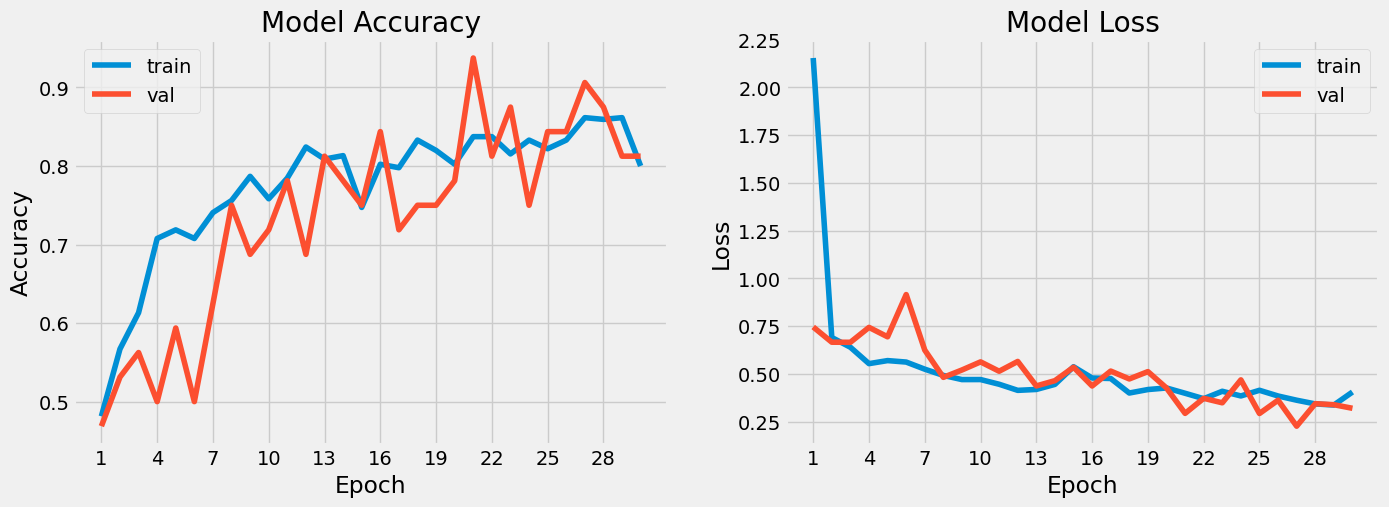

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
plt.style.use('fivethirtyeight')

def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1), model_history.history['accuracy'])
    axs[0].plot(range(1,len(model_history.history['val_accuracy'])+1), model_history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1, len(model_history.history['accuracy'])+1, len(model_history.history['accuracy'])/10))
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1), model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1), model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1, len(model_history.history['loss'])+1, len(model_history.history['loss'])/10))
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

plot_model_history(model_info)

In [31]:
from keras.models import Sequential

In [32]:
feature_extractor = Sequential()
for layer in classifier.layers[:-2]:  # Copy all layers except the output layer
    feature_extractor.add(layer)

In [33]:
def extract_features(data_generator):
    features = []
    labels = []
    for batch in data_generator:
        x, y = batch
        feature = feature_extractor.predict(x)
        features.extend(feature)
        labels.extend(y)
        if len(features) >= data_generator.samples:
            break
    return np.array(features), np.array(labels)

train_features, train_labels = extract_features(training_set)
test_features, test_labels = extract_features(test_set)

1/1 [==============================] - 1s 592ms/step


In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Create and train KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train_features.reshape(train_features.shape[0], -1), train_labels)

# Predict using KNN on the test set
test_predictions = knn.predict(test_features.reshape(test_features.shape[0], -1))

# Calculate accuracy
accuracy = accuracy_score(test_labels, test_predictions)
print(f"KNN Classifier Accuracy: {accuracy * 100:.2f}%")

KNN Classifier Accuracy: 84.38%
